In [1]:
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report


from joblib import dump
from preprocess import prep_data
from joblib import load

import matplotlib

In [2]:
df = pd.read_csv(("fish_participant.csv"))
df = df.assign(hw=df["Height"] * df["Width"])
df = df.assign(l3_l1_ratio = df["Length3"]/df["Length1"])
df = df.assign(l3l1width = df["Length3"]/df["Length1"]* df["Width"])
df = df.assign(l3l1height = df["Length3"]/df["Length1"]* df["Height"])
df


,Species,Weight,Length1,Length2,Length3,Height,Width,hw,l3_l1_ratio,l3l1width,l3l1height
0,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,63.887496,1.283019,6.587019,15.965887
1,Perch,110.0,20.0,22.0,23.5,5.5225,3.9950,22.062387,1.175000,4.694125,6.488938
2,Roach,160.0,20.5,22.5,25.3,7.0334,3.8203,26.869698,1.234146,4.714809,8.680245
3,Parkki,60.0,14.3,15.5,17.4,6.5772,2.3142,15.220956,1.216783,2.815880,8.003027
4,Bream,700.0,30.4,33.0,38.3,14.8604,5.2854,78.543158,1.259868,6.658909,18.722149
...,...,...,...,...,...,...,...,...,...,...,...
106,Perch,197.0,23.5,25.6,27.0,6.5610,4.2390,27.812079,1.148936,4.870340,7.538170
107,Parkki,140.0,19.0,20.7,23.2,8.5376,3.2944,28.126269,1.221053,4.022636,10.424859
108,Roach,110.0,19.1,20.8,23.1,6.1677,3.3957,20.943659,1.209424,4.106841,7.459365
109,Perch,685.0,34.0,36.5,39.0,10.8810,6.8640,74.687184,1.147059,7.873412,12.481147


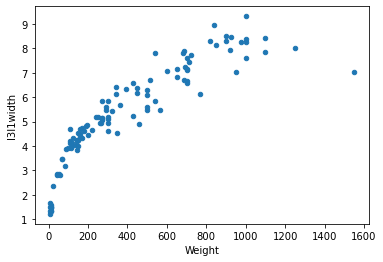

In [3]:
ax1 = df.plot.scatter(x="Weight", y="l3l1width")

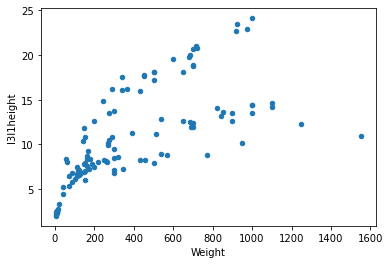

In [4]:
ax1 = df.plot.scatter(x="Weight", y="l3l1height")

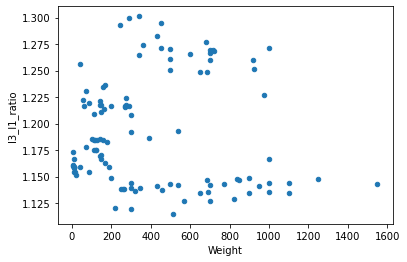

In [5]:
ax1 = df.plot.scatter(x="Weight", y="l3_l1_ratio")

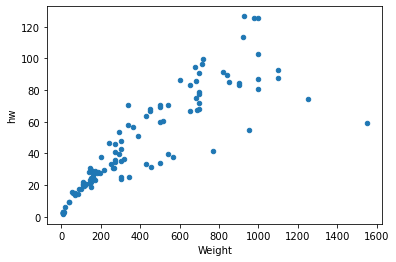

In [6]:
ax1 = df.plot.scatter(x="Weight", y="hw")

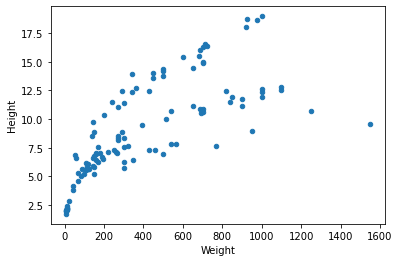

In [7]:
ax1 = df.plot.scatter(x="Weight", y="Height")

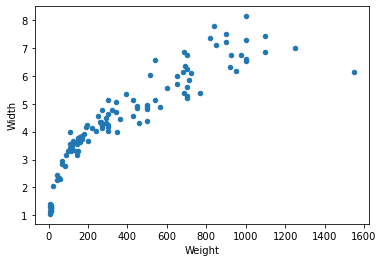

In [8]:
ax1 = df.plot.scatter(x="Weight", y="Width")

In [9]:
X, y = prep_data(df)

In [10]:
kf = KFold(n_splits = 20, shuffle = True, random_state = 55)
kf.get_n_splits(X)

print(kf)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], [test_index]
    

KFold(n_splits=20, random_state=55, shuffle=True)
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  18
  19  20  21  23  24  25  26  27  29  30  31  32  33  34  35  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  84  85  86  87  88  89  90  91  92  93  94
  95  97  98  99 100 101 102 103 104 105 106 107 108 109 110] TEST: [17 22 28 36 83 96]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  82  83  84  85  86  87  88  89  91  92
  94  95  96  98  99 100 101 103 104 105 106 107 108 109 110] TEST: [ 41  81  90  93  97 102]
TRAIN: [  0   1   2   3 

In [13]:
wrf = RandomForestClassifier(class_weight = "balanced")
wrf.fit(X_train, y_train)
y_pred = wrf.predict(X_test)


# nb = GaussianNB()
# nb.fit(X, y)

# lr = LinearRegression()
# lr.fit(X,y)

In [14]:
dump(wrf, "wrf_jl.joblib")

['wrf_jl.joblib']

In [15]:
def predict_from_csv(path_to_csv):

    df = pd.read_csv(path_to_csv)
    X, y = prep_data(df)

#     reg = load("wrf_v1.joblib")
#     reg = load("gnb_jl.joblib")
#     reg = load("lr_jl.joblib")
    reg = load("wrf_jl.joblib")


    predictions = reg.predict(X)

    return predictions

In [16]:
if __name__ == "__main__":
    predictions = predict_from_csv(("fish_holdout_demo.csv"))
    print(predictions)
    print(pd.read_csv("fish_holdout_demo.csv")["Weight"].values)

[ 140  150    9  430  456  169  567    8  340  320  500  188  260   70
  290  500    5  700  125   87  272 1000  170 1000  720 1100  100  160]
[ 140.   150.     9.8  430.   456.   169.   567.     8.7  340.   320.
  500.   188.   260.    70.   363.   500.     5.9  700.   125.    87.
  272.  1000.   170.  1000.   720.  1100.   100.   160. ]


In [ ]:
df_fish_comp = pd.read_csv("fish_holdout_demo.csv")
df_fish_comp["Predicted Weight"] = predictions
df_fish_comp

In [ ]:
ax1 = df_fish_comp.plot.scatter(x="Weight", y="Predicted Weight")